<a href="https://colab.research.google.com/github/JMNeto28/PDI---UFAL/blob/main/Filtragem_do_dom%C3%ADnio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Alagoas

Instituto de Computação - IC

Processamento Digital de Imagens - PDI

Professor: Thiago Vieira

Alunos: João da Silva Muniz Neto

In [1]:
import cv2
import numpy as ny
import math
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import pyplot as pl
from google.colab.patches import cv2_imshow

# ***(a) Obtenha F(u,v)=F{f(x,y)} usando o OpenCV e o Numpy.***

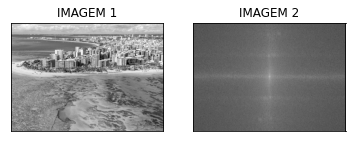

In [4]:
foto = cv2.imread('mcz.jpg', 0)
f = ny.fft.fft2(foto)
fshift = ny.fft.fftshift(f)
magnitude_spectrum = 20*ny.log(ny.abs(fshift))

pl.subplot(121),pl.imshow(foto, cmap = 'gray')
pl.title('IMAGEM 1'), pl.xticks([]), pl.yticks([])
pl.subplot(122),pl.imshow(magnitude_spectrum, cmap = 'gray')
pl.title('IMAGEM 2'), pl.xticks([]), pl.yticks([])
pl.show()

# ***(b) Apresente as imagens Re{F(u,v)}, Im{F(u,v)} e |F(u,v)|. Mostre as imagens com e sem o fftshift.***

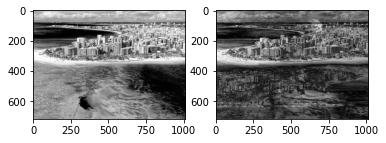

In [6]:
foto = ny.random.random((100, 100))
foto = pl.imread(r'mcz.jpg')[:,:,0]

fft_foto = ny.fft.fft2(foto)
fft_img_shift = ny.fft.fftshift(fft_foto)

real = fft_img_shift.real
phases = fft_img_shift.imag
real_mod = real/3

fft_img_shift_mod = ny.empty(real.shape, dtype=complex)
fft_img_shift_mod.real = real_mod
fft_img_shift_mod.imag = phases
fft_img_mod = ny.fft.ifftshift(fft_img_shift_mod)
img_mod = ny.fft.ifft2(fft_img_mod)
img_mod = ny.abs(img_mod)

pl.subplot(121)
pl.imshow(foto, cmap='gray')
pl.subplot(122)
pl.imshow(img_mod, cmap='gray')
pl.show()

# ***(c) Efetue um transformacao de |F(u,v)| adequado para melhor visualizar as baixas frequencias.***

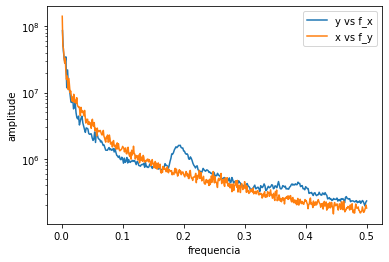

In [10]:
foto = cv2.imread('mcz.jpg',0)

n = int( math.ceil(foto.shape[0] / 2.) * 2 )
a = ny.fft.rfft(foto,n, axis=0)
a = a.real*a.real + a.imag*a.imag
a = a.sum(axis=1)/a.shape[1]

f = ny.fft.rfftfreq(n)

pl.plot(f[1:],a[1:], label = 'y vs f_x')


n = int( math.ceil(foto.shape[1] / 2.) * 2 )

a = ny.fft.rfft(foto,n,axis=1)
a = a.real*a.real + a.imag*a.imag
a = a.sum(axis=0)/a.shape[0]

f = ny.fft.rfftfreq(n)

pl.plot(f[1:],a[1:],  label ='x vs f_y')

pl.ylabel( 'amplitude' )
pl.xlabel( 'frequencia' )
pl.yscale( 'log' )

pl.legend()
pl.show()

# ***(d) Crie um filtro passa-baixas com resposta em frequencia H(u,v) e apresente o resultado da filtragem da imagem f(x,y) por esse filtro.***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


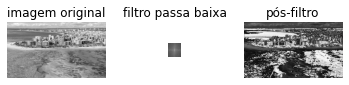

In [15]:
def lowPassFiltering(img,size):
    h, w = img.shape[0:2]
    h1,w1 = int(h/2), int(w/2)
    img2 = ny.zeros((h, w), ny.uint8)
    img2[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 1
    img3=img2*img
    return img3

def cv2_imread(file_path, flag=1):
    return cv2.imdecode(ny.fromfile(file_path, dtype=ny.uint8), flag)

gray = cv2_imread("mcz.jpg", 1)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (1280, 720))
h,w =gray.shape

for i in range(3000):
    x = ny.random.randint(0, h)
    y = ny.random.randint(0, w)
    gray[x,y] = 255

img_dft = ny.fft.fft2(gray)
dft_shift = ny.fft.fftshift(img_dft)

dft_shift = lowPassFiltering(dft_shift, 200)
res = ny.log(ny.abs(dft_shift))

idft_shift = ny.fft.ifftshift(dft_shift)
ifimg = ny.fft.ifft2(idft_shift)
ifimg = ny.abs(ifimg)


pl.subplot(131), pl.imshow(gray, 'gray'), pl.title('imagem original')
pl.axis('off')
pl.subplot(132), pl.imshow(res, 'gray'), pl.title('filtro passa baixa')
pl.axis('off')
pl.subplot(133), pl.imshow(ny.int8(ifimg), 'gray'), pl.title('pós-filtro')
pl.axis('off')
pl.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

# ***(e) Faça o mesmo para um filtro passa-altas.***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


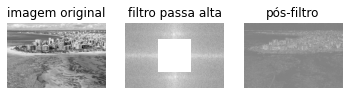

In [17]:
def highPassFiltering(img,size):
    h, w = img.shape[0:2]
    h1,w1 = int(h/2), int(w/2)
    img[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 0
    return img

def cv2_imread(file_path, flag=1):
    return cv2.imdecode(ny.fromfile(file_path, dtype=ny.uint8), flag)

gray = cv2_imread("mcz.jpg", 1)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (640, 420))

img_dft = ny.fft.fft2(gray)
dft_shift = ny.fft.fftshift(img_dft)

dft_shift=highPassFiltering(dft_shift,200)
res = ny.log(ny.abs(dft_shift))

idft_shift = ny.fft.ifftshift(dft_shift)
ifimg = ny.fft.ifft2(idft_shift)
ifimg = ny.abs(ifimg)


pl.subplot(131), pl.imshow(gray, 'gray'), pl.title('imagem original')
pl.axis('off')
pl.subplot(132), pl.imshow(res, 'gray'), pl.title('filtro passa alta')
pl.axis('off')
pl.subplot(133), pl.imshow(ny.int8(ifimg), 'gray'), pl.title('pós-filtro')
pl.axis('off')
pl.show()
cv2.waitKey(0)
cv2.destroyAllWindows()